In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading data set

In [26]:
df = pd.read_csv("fraudDetection.csv")
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0


In [27]:
df.shape

(1048575, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   nameDest        1048575 non-null  object 
 6   oldbalanceDest  1048575 non-null  float64
 7   newbalanceDest  1048575 non-null  float64
 8   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 72.0+ MB


# Checking the missing values

In [29]:
df.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])
df['type'] = label_encoder.fit_transform(df['type'])

# Assign X & Y

In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values

<Axes: ylabel='count'>

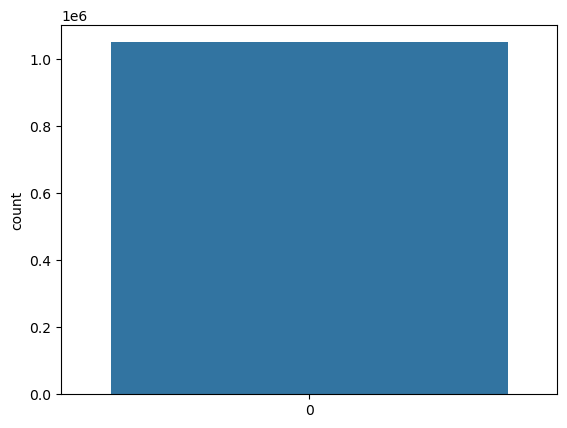

In [35]:
sns.countplot(df['isFraud'])

# Split the data for Training and Testing

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state = 2)
print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain.shape)
print()
print('Training data-Y- shape: \t',ytrain.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest.shape)

******************************Training data******************************
Training data-X- shape: 	 (786431, 8)

Training data-Y- shape: 	 (786431, 1)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (262144, 8)

Training data-(Y-outcome)-shape: 	 (262144, 1)


# Model Development with Logistic Regression Algorithm

In [37]:
#Calling Logsitic Regression
log_reg = LogisticRegression(solver = 'liblinear', verbose =2 )

#Train the model
print('Training the model \n')
log_reg.fit(xtrain,ytrain)

#Testing the model
ypred = log_reg.predict(xtest)
print('Predicted label for the input samples : \n',ypred)
print()
print('Testing competed\n')
print('Testing samples are:\n',len(ypred))

Training the model 

[LibLinear]

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted label for the input samples : 
 [0 0 0 ... 0 0 0]

Testing competed

Testing samples are:
 262144


# Performance Measure

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('*'*30 + 'Performance Measures on Logistic Regression Classification' + '*'*30)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*80)

******************************Performance Measures on Logistic Regression Classification******************************
Accuracy score:	
 0.9991378784179688


Confusion matrix:	
 [[261805     59]
 [   167    113]]


Classification report is:	
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       0.66      0.40      0.50       280

    accuracy                           1.00    262144
   macro avg       0.83      0.70      0.75    262144
weighted avg       1.00      1.00      1.00    262144




In [39]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64